# Sapphire A-type signal under review
In the sanfran expermint (the paper) we measured an increase of a-type signal.

This note tries to study why we did not measure the increase of signal in the last californium irradiation (californication expermint).

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import numpy as np
from sanfran import creat2d,plot1d

Read data from SanFran expermint.

In [5]:
#1. counts_NoBaseline -> Remove estimated baseline (done roughly by eye and only works for 10 sec exposures)
#2. counts_normalized ->divide by power
df = pd.read_csv("DataFramForYossi/san_fran_pre_irrad_wheel5/SP_B1_003.csv","\t")
df["counts_NoBaseline"] = (df["counts"]-1351)
df["counts_normalized"] = df["counts_NoBaseline"] / df["power_av"]
df2 = pd.read_csv("DataFramForYossi/san_fran_post_irrad_wheel5/SP_B1_003.csv","\t")
df2["counts_NoBaseline"] = (df2["counts"]-1351)
df2["counts_normalized"] = df2["counts_NoBaseline"] / df2["power_av"]
diff = df.copy()
diff["counts"] = df2["counts_normalized"] - df["counts_normalized"]

# Californium irradiated SP_003
# 1. 2d Plot
Left plot are measuremnts at low emmision wavelengths and no filter for 250-340 excitation wavlengths.<br> 
Middle plot are measuremnts at high emmision wavelengths and no filter for 250-340 excitation wavlengths.<br> 
Right plot are measuremnts at high emmision wavelengths with filter.<br> 
Top three are befroe irradaition.<br> 
Middle is after.<br> 
Bottom is After-Before.<br> 

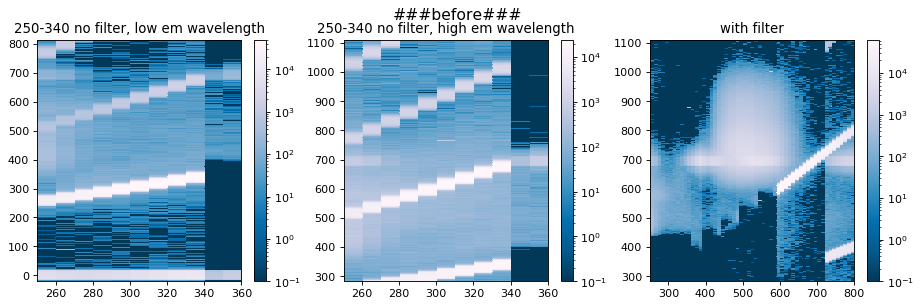

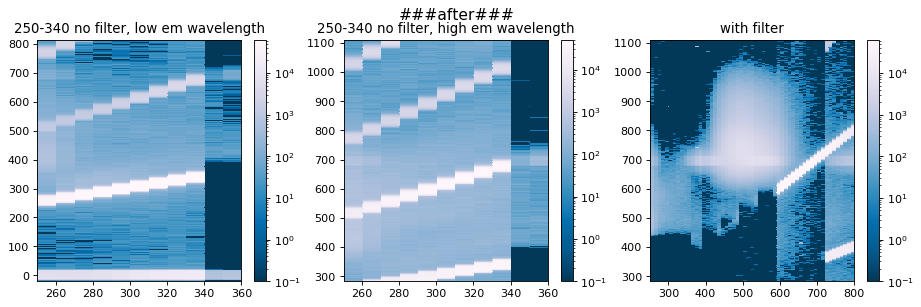

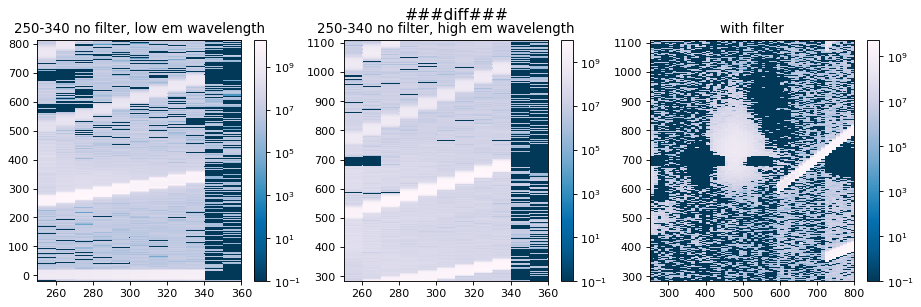

In [3]:
fig=plt.figure(1,figsize=(14, 4), dpi= 80, facecolor='w', edgecolor='k')
fig.suptitle('###before###', fontsize=14)
creat2d(df,counts="counts_NoBaseline")
fig=plt.figure(2,figsize=(14, 4), dpi= 80, facecolor='w', edgecolor='k')
fig.suptitle('###after###', fontsize=14)
creat2d(df2,counts="counts_NoBaseline")
fig=plt.figure(3,figsize=(14, 4), dpi= 80, facecolor='w', edgecolor='k')
fig.suptitle('###diff###', fontsize=14)
creat2d(diff,counts="counts")

# 2. 1d Plot focused on 250 Excitation

/home/weiss/workdir/CCAnalsys/sanfran.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  before = df[df["ex_wl"]==ex_wl][df["exp_time"]==exp_time][df["lpf"]==lpf][df["spectro_wl"]==spectro_wl]
/home/weiss/workdir/CCAnalsys/sanfran.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after = df2[df["ex_wl"]==ex_wl][df["exp_time"]==exp_time][df["lpf"]==lpf][df["spectro_wl"]==spectro_wl]
/home/weiss/workdir/CCAnalsys/sanfran.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  diff250nm = diff[df["ex_wl"]==ex_wl][df["exp_time"]==exp_time][df["lpf"]==lpf][df["spectro_wl"]==spectro_wl]
/home/weiss/workdir/CCAnalsys/sanfran.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  before = df[df["ex_wl"]==ex_wl][df["exp_time"]==exp_time][df["lpf"]==lpf][df["spectro_wl"]==spectro_wl]
/home/weiss/workdir/CCAnalsys/sanfran.py:8: UserWarning: Boolean Series key will be reindex

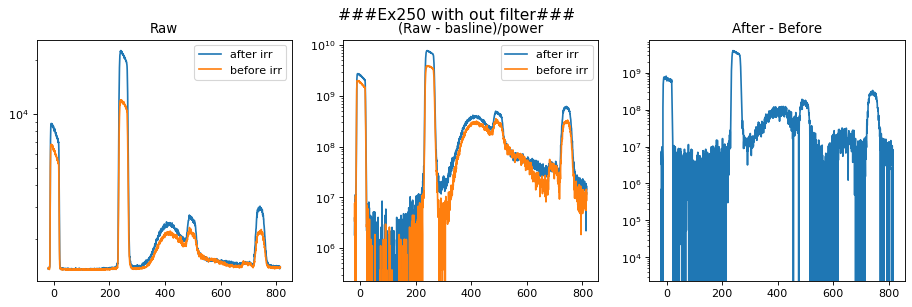

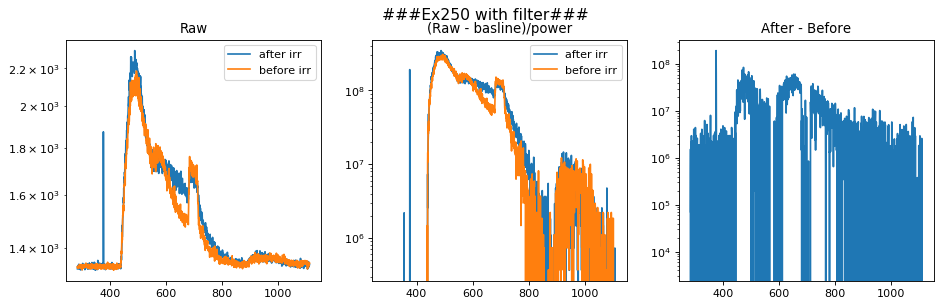

In [8]:
fig=plt.figure(1,figsize=(14, 4), dpi= 80, facecolor='w', edgecolor='k')
fig.suptitle('###Ex250 with out filter###', fontsize=14)
plot1d(df,df2,diff)
fig=plt.figure(2,figsize=(14, 4), dpi= 80, facecolor='w', edgecolor='k')
fig.suptitle('###Ex250 with filter###', fontsize=14)
plot1d(df,df2,diff,ex_wl=250,exp_time=10,spectro_wl=700,lpf=450)

# Measurments Taken 8th of june 2020
Here I latly retook measurmens of 250 nm excitation to diffrent crystals from both expermints

In [63]:
def plot_all(sp_list,title_list):
    for i,(name,title) in enumerate(zip(sp_list,title_list)):
        plt.subplot(len(sp_list),1, i+1)   
        #power = np.genfromtxt("Data/"+name+"_power.asc")
        spectrum = np.genfromtxt("Data/"+name+"_signal.asc",skip_header = 31).T
        plt.plot(spectrum[0,:],spectrum[1,:])
        plt.title(title)
        plt.yscale("log")

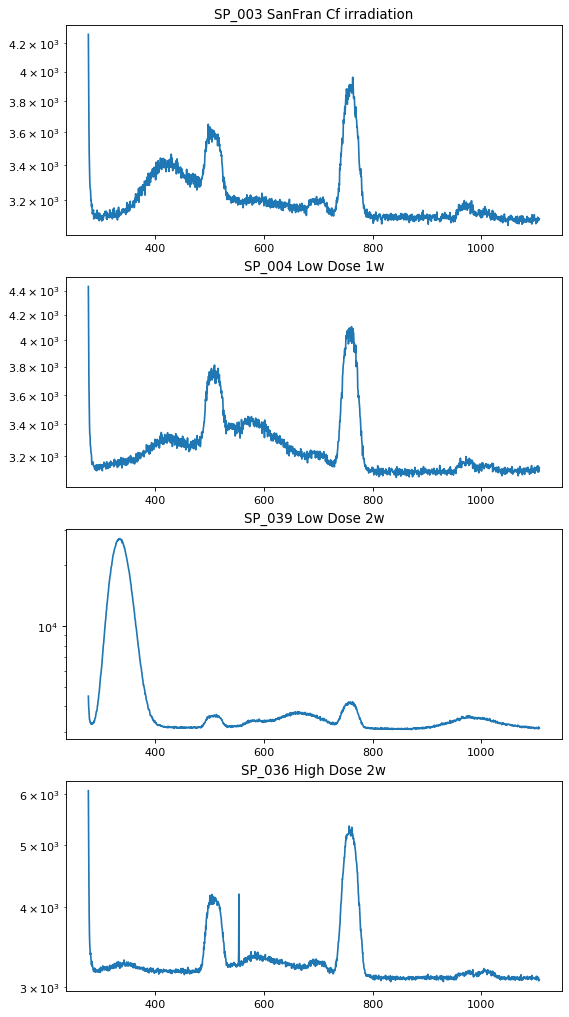

In [68]:
sp_list = ["SP_003","SP_004","SP_039","SP_036"]
title = ["SP_003 SanFran Cf irradiation","SP_004 Low Dose 1w","SP_039 Low Dose 2w","SP_036 High Dose 2w"]
fig=plt.figure(1,figsize=(8, 16), dpi= 80, facecolor='w', edgecolor='k')
plot_all(sp_list,title)

In [ ]:
nm400 =(np.abs(after["em_wl"] - 400)).argmin()
nm750 =(np.abs(after["em_wl"] - 750)).argmin()
nm0 =(np.abs(after["em_wl"] - 100)).argmin()
print(after["counts"].iloc[nm0])
print((after["counts_normalized"].max())/(before["counts_normalized"].max()))
print((after["counts_normalized"].iloc[nm750])/(before["counts_normalized"].iloc[nm750]))
print((after["counts_normalized"].iloc[nm400])/(before["counts_normalized"].iloc[nm400]))